# EDA 2

## Data Exploration and Preprocessing:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Assignments/EDA 2/adult_with_headers.csv")
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- There are 32k+ entries and there are no null values and there are two types of data types ( both integer and objects)

In [4]:
#print(data.describe(include='all'))
data.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


- We all know that describe function is for the numerical entries and to calculate the statistical summary for those numerical values
-  And if we use include = all, then we can know different summaries of the dataset and its attributes such as unique values(for categorical values) for columns, frequency(for categorical values), Top(for categorical values)  

In [5]:
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


- No Missing Values, so there is no handling of the missing values
- before scaling the data lets see there distribution using hist plots and density plots

#### Visualization

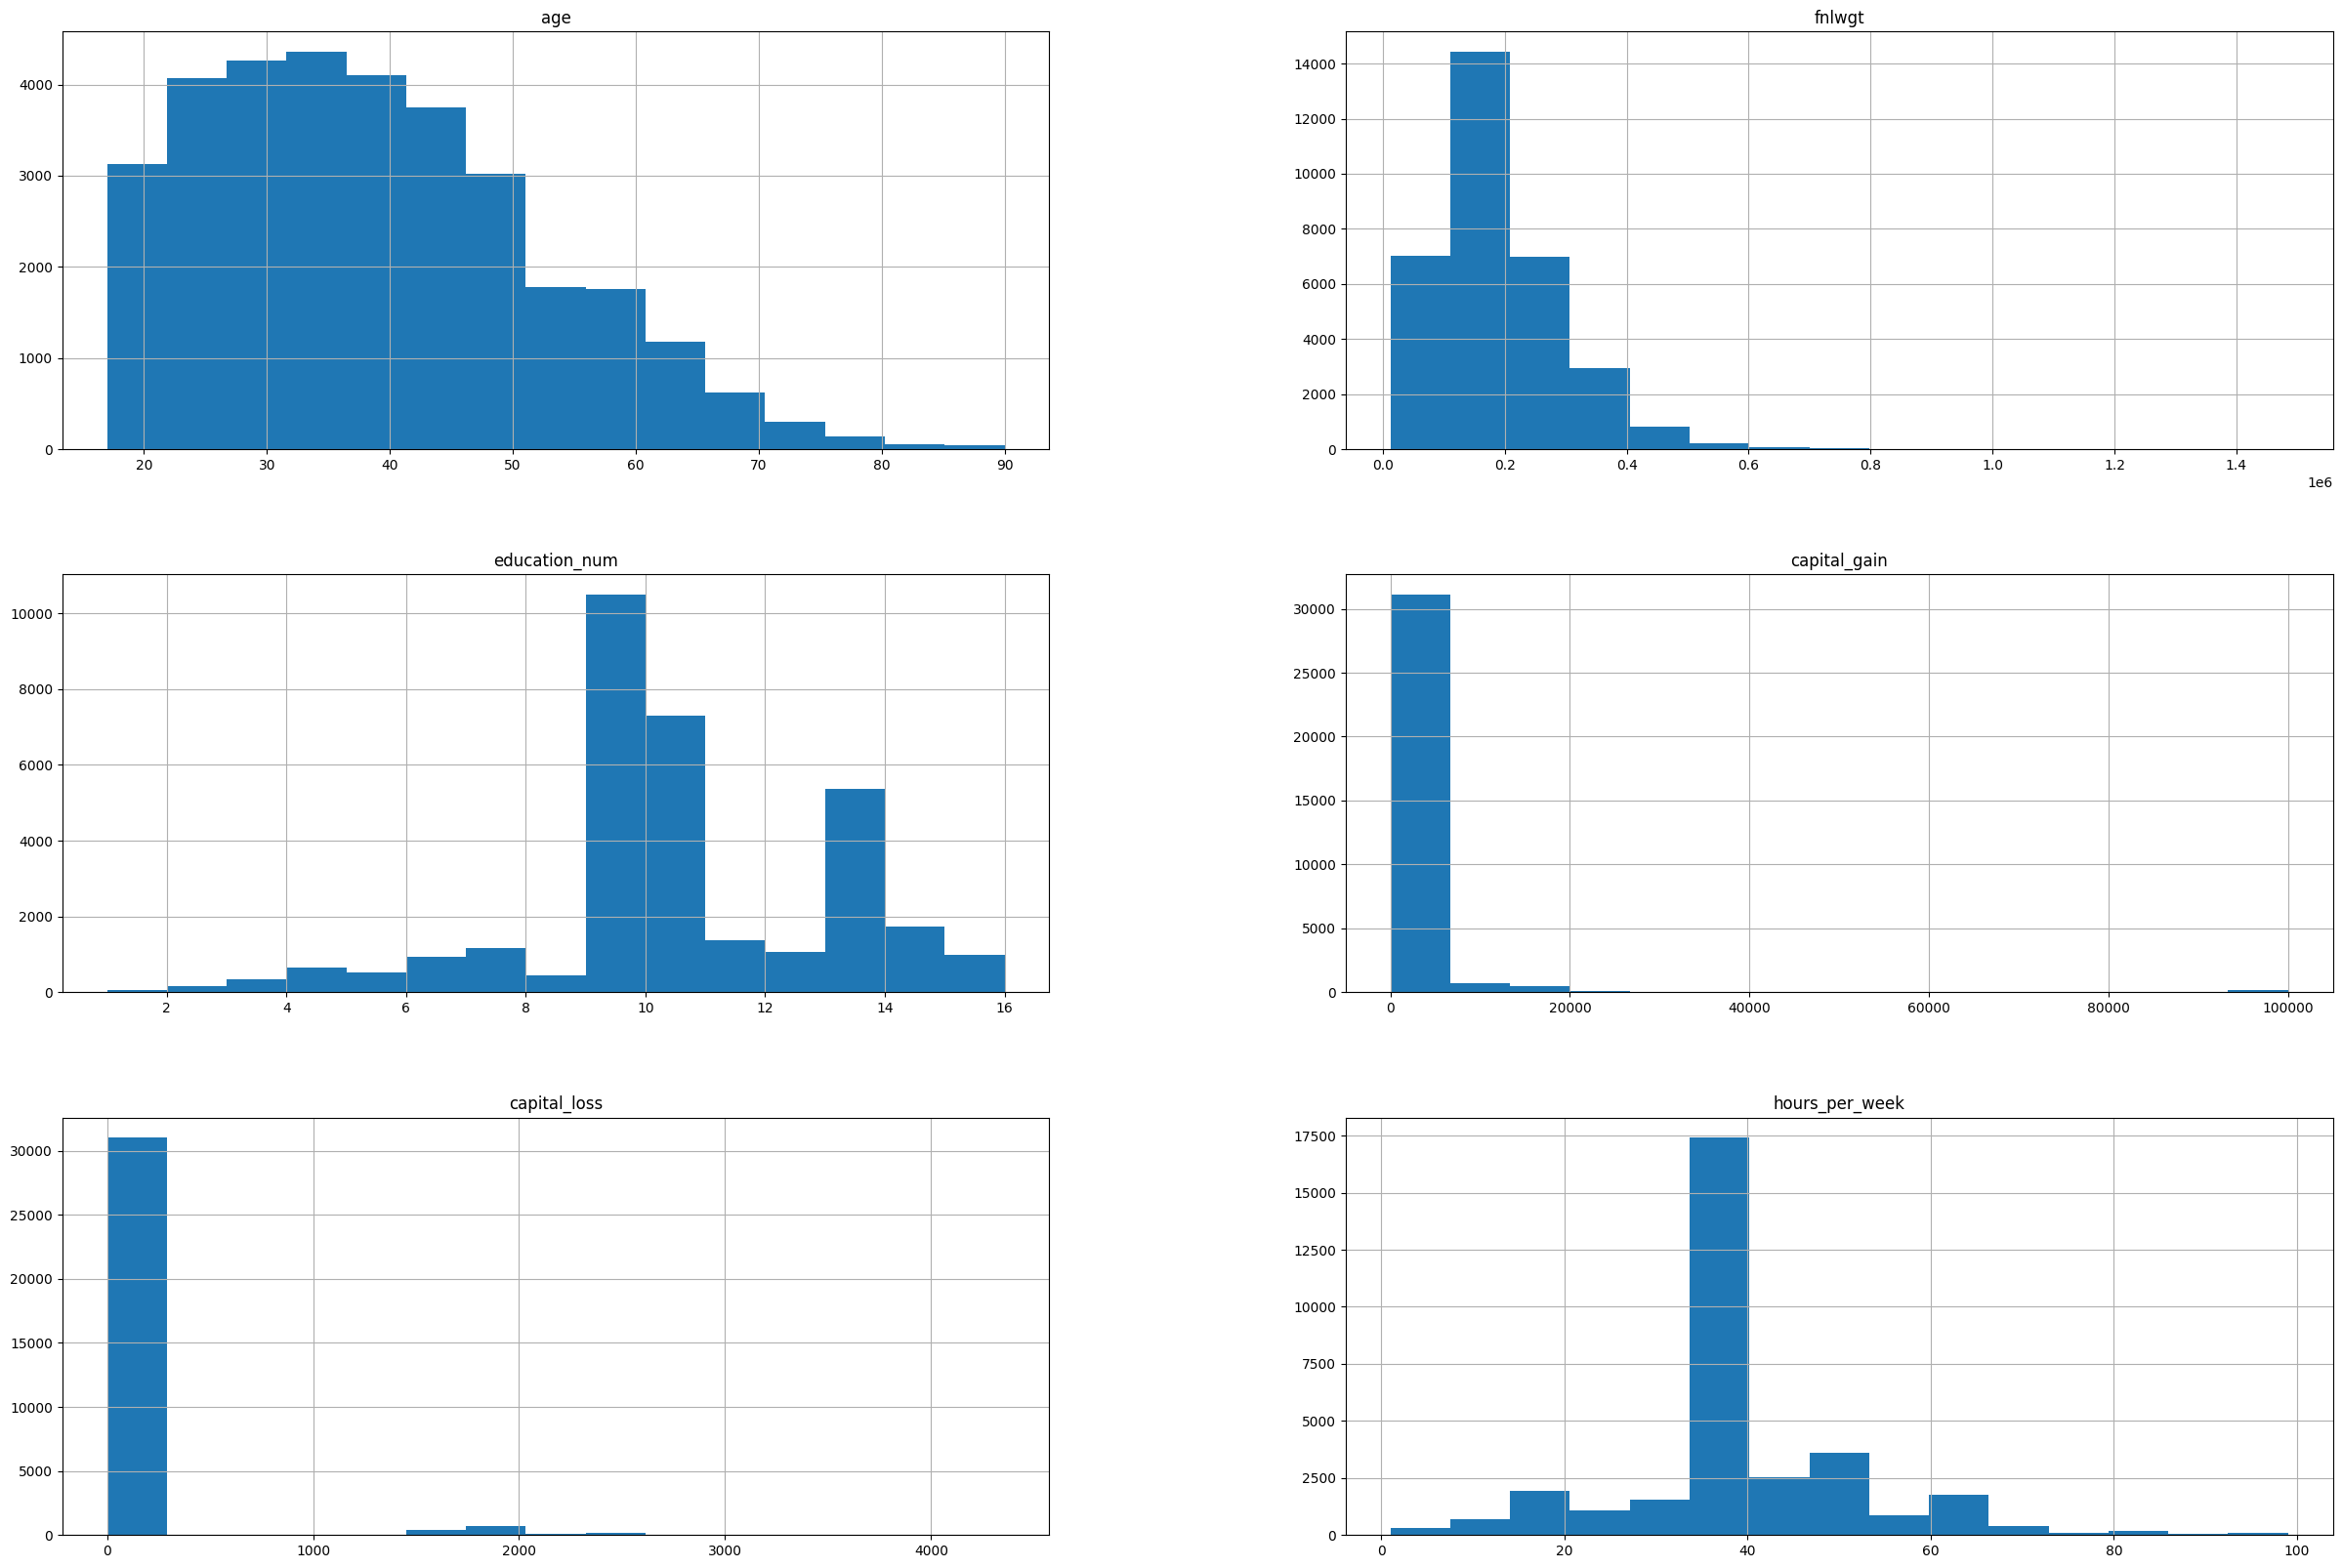

In [6]:
data.hist(bins=15, figsize=(30, 20))
plt.show()

- Apart from the age and Hours_per_week , the other hisograms are skewed data

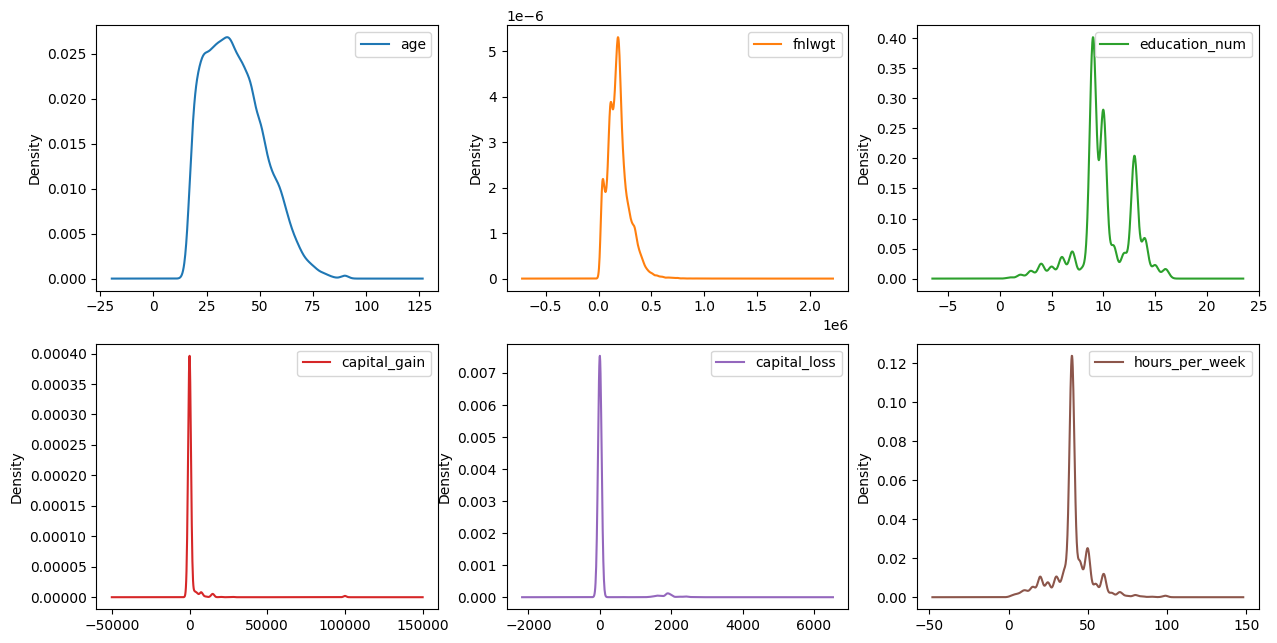

In [7]:
data.plot(kind='density', subplots=True, layout=(5, 3), figsize=(15, 20), sharex=False)
plt.show()

In summary, the following features are skewed:

- **fnlwgt**
- **capital_gain**
- **capital_loss**
- **hours_per_week (slightly)**

The other features, **age** and **education_num**, do not show significant skewness.

#### Applying the Scaling techniques

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = data.copy()
df_standard_scaled[numerical_features] = scaler_standard.fit_transform(data[numerical_features])

# Display the first few rows of the scaled datasets
#df_standard_scaled_head
df_standard_scaled.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


In [9]:
# Apply Min-Max Scaling
scaler_min_max = MinMaxScaler()
df_min_max_scaled = data.copy()
df_min_max_scaled[numerical_features] = scaler_min_max.fit_transform(data[numerical_features])

#df_min_max_scaled_head =
df_min_max_scaled.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


**Standard scaling (StandardScaler) and MinMax scaling (MinMaxScaler) are both techniques for normalizing or standardizing data, but they are used in different contexts based on the needs of the data and the machine learning algorithm being used.**

- Standard Scaling (StandardScaler)
  - Standard scaling transforms the data to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the data and then dividing by the standard deviation.
  - Use when data is approximately normally distributed, and for algorithms that assume normally distributed data or rely on variance (e.g., Linear Models, SVMs, PCA).
- MinMax Scaling (MinMaxScaler)
  - MinMax scaling transforms the data to fit within a given range, typically 0 to 1. This is done by subtracting the minimum value and then dividing by the range (maximum value minus minimum value).
  - Use when data is bounded and for algorithms that are sensitive to the magnitude of the data but do not assume any particular distribution (e.g., Neural Networks).

## Encoding Techniques:

#### •	Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [10]:
# Identify categorical variables with less than 5 categories
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features_less_5 = [col for col in categorical_features if data[col].nunique() < 5]

# Apply One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(data, columns=categorical_features_less_5)

df_one_hot_encoded.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,0,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0,1,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0,1,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,0,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,1,0,1,0


- So , the attributed that have categorical entries less than 5 are only sex and income<=50k and know they are encoded into **sex_female,sex_male, income<=50k and income>50k**

#### Applying Label Encoding for categorical variables with more than 5 categories.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical variables with more than 5 categories
categorical_features_more_5 = [col for col in categorical_features if data[col].nunique() >= 5]

# Apply Label Encoding
label_encoders = {}
df_label_encoded = data.copy()

for col in categorical_features_more_5:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

df_label_encoded.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K


In [12]:
print(categorical_features_more_5)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


- So these are the categorical features that have more than 5 unique values

One-Hot Encoding and Label Encoding are techniques used for converting categorical variables into a format that can be provided to machine learning algorithms to improve predictions.

**ONE HOT ENCODING:** One-Hot Encoding transforms each categorical value into a new categorical column and assigns a binary value (1 or 0) to each column.
  - PROS:
      - One-Hot Encoding does not assume any ordinal relationship between categories, making it suitable for nominal categories
      - Many machine learning algorithms and frameworks support one-hot encoded data well.
  - CONS:
      - One-Hot Encoding can create a large number of new columns, especially if the categorical variable has many unique values. This can lead to a sparse matrix and increase computational cost and memory usage.[HIGH DIMENSIONALITY PROBLEM ARISES]
      - When dealing with high cardinality features (features with a large number of unique values), one-hot encoding can become impractical, and makes the modle more prone to overfitting

**LABEL ENCODING:**Label Encoding assigns a unique integer to each category. For example, categories like ["red", "green", "blue"] might be encoded as [0, 1, 2].
  - PROS:
      - Label Encoding is straightforward and quick to implement.
      - Unlike One-Hot Encoding, Label Encoding does not increase the dimensionality of the dataset.
      -  It does not create additional columns, so it is more memory efficient than One-Hot Encoding.
  - CONS:
      - Label Encoding imposes an ordinal relationship between categories, which might not be desirable. For instance, the encoded values [0, 1, 2] suggest an ordering that does not exist for nominal data.
      -  Some machine learning algorithms might interpret the encoded integers as having a ranking, leading to incorrect conclusions or biased models.
      - The encoded integers might be less interpretable compared to the original categorical values, especially when reviewing or debugging the model.

## Feature Engineering

#### Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [13]:
data['age_bin'] = pd.cut(data['age'], bins=[0, 30, 50, 100], labels=['young', 'middle_age', 'senior'])
data['hours_per_week_bin'] = pd.cut(data['hours_per_week'], bins=[0, 25, 40, 60, 100], labels=['part_time', 'full_time', 'overtime', 'extreme_overtime'])


- The new feature **'age_bin'** categorizes individuals into age groups, which could help the model understand age-related patterns.
- The **'hours_per_week_bin'** feature groups individuals based on their working hours, which might correlate with income.

#### •	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature

In [14]:

# Identify skewed features
skewed_features = data.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)

# Apply log transformation to the most skewed feature
skewed_feature = skewed_features.index[0]
data[skewed_feature + '_log'] = np.log1p(data[skewed_feature])


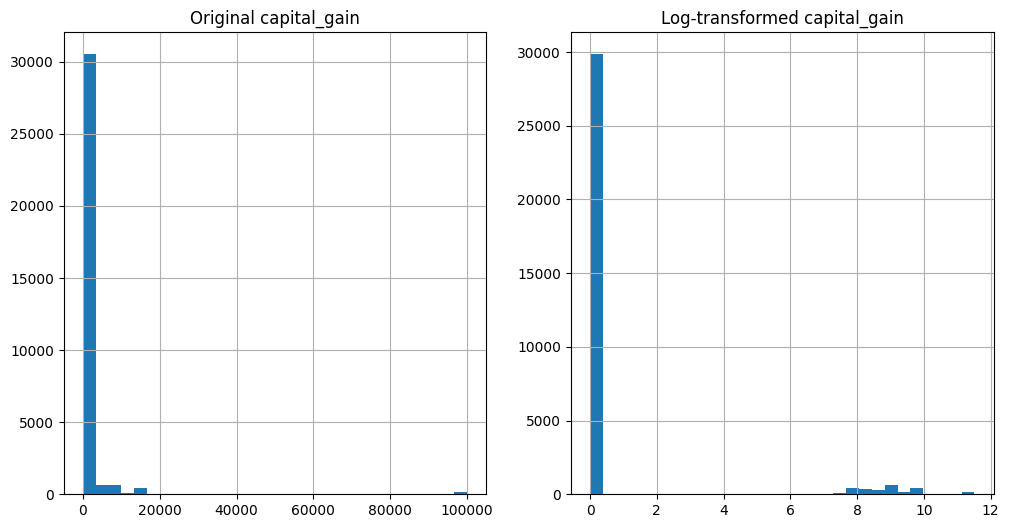

In [15]:
# Plot before and after transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
data[skewed_feature].hist(ax=ax[0], bins=30)
ax[0].set_title(f'Original {skewed_feature}')
data[skewed_feature + '_log'].hist(ax=ax[1], bins=30)
ax[1].set_title(f'Log-transformed {skewed_feature}')
plt.show()

In [16]:
skewed_feature_1 = skewed_features.index[1]
data[skewed_feature_1 + '_log'] = np.log1p(data[skewed_feature_1])

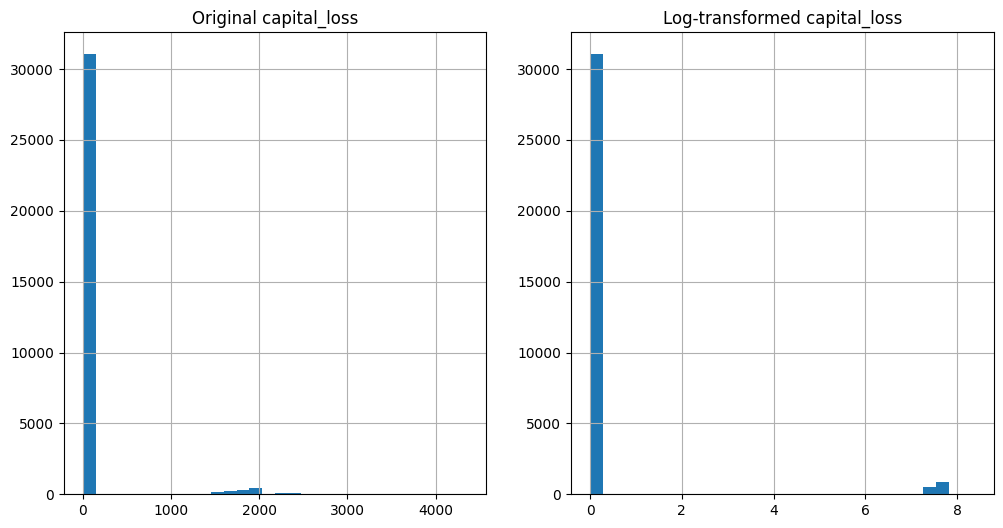

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
data[skewed_feature_1].hist(ax=ax[0], bins=30)
ax[0].set_title(f'Original {skewed_feature_1}')
data[skewed_feature_1 + '_log'].hist(ax=ax[1], bins=30)
ax[1].set_title(f'Log-transformed {skewed_feature_1}')
plt.show()

In [18]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_bin,hours_per_week_bin,capital_gain_log,capital_loss_log
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,middle_age,full_time,7.684784,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,middle_age,part_time,0.000000,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,middle_age,full_time,0.000000,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,senior,full_time,0.000000,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,young,full_time,0.000000,0.0


In [19]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(data.select_dtypes(include=['number']))

# Remove outliers
data_cleaned = data[outliers == 1]

In [20]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 0 to 32559
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 29305 non-null  int64   
 1   workclass           29305 non-null  object  
 2   fnlwgt              29305 non-null  int64   
 3   education           29305 non-null  object  
 4   education_num       29305 non-null  int64   
 5   marital_status      29305 non-null  object  
 6   occupation          29305 non-null  object  
 7   relationship        29305 non-null  object  
 8   race                29305 non-null  object  
 9   sex                 29305 non-null  object  
 10  capital_gain        29305 non-null  int64   
 11  capital_loss        29305 non-null  int64   
 12  hours_per_week      29305 non-null  int64   
 13  native_country      29305 non-null  object  
 14  income              29305 non-null  object  
 15  age_bin             29305 non-null  

- Around 1% of the data has been removed considering them as outliers using **Isolation Forest** algorithm

- Outliers can significantly impact the performance of machine learning models

- Tree-Based Models (e.g., Decision Trees, Random Forests)

- Robustness to Outliers: Tree-based models are generally more robust to outliers compared to linear and distance-based models. However, extreme outliers can still affect the model’s decision boundaries and splits.

- Example: A decision tree might create splits that accommodate the outliers, leading to overfitting.

- **Impact on Model Performance:**

- *Bias:* Outliers can increase the bias of a model by pulling the decision boundary towards themselves, leading to a model that does not generalize well.
- *Variance:* Outliers can also increase the variance of a model, causing it to overfit the training data but perform poorly on unseen data.


- **Model Evaluation Metrics:**

- *Accuracy, Precision, Recall:* Outliers can skew these metrics, making the model appear to perform better or worse than it actually does.
- Example: In a classification task, if outliers are misclassified, they can disproportionately affect the precision and recall values.

## Feature Selection:

In [21]:
! pip install ppscore

In [22]:
import ppscore as pps

# Calculate PPS matrix
pps_matrix = pps.matrix(data_cleaned)

# Compare PPS with correlation matrix
correlation_matrix = data_cleaned.corr()


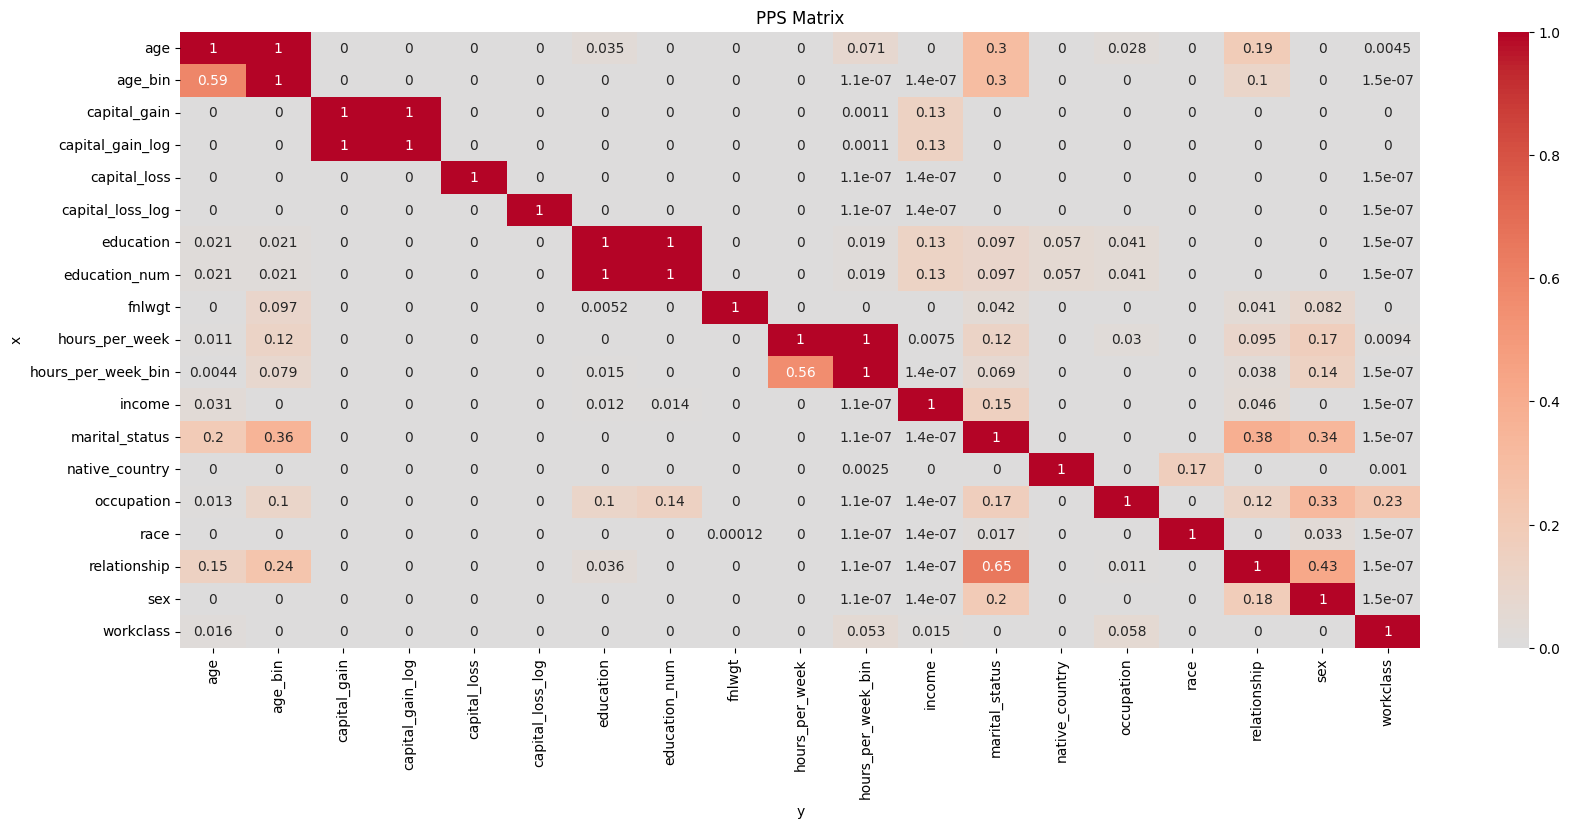

In [24]:
# Plot PPS matrix
plt.figure(figsize=(20, 8))
sns.heatmap(pps_matrix.pivot('x', 'y', 'ppscore'), annot=True, cmap='coolwarm', center=0)
plt.title('PPS Matrix')
plt.show()


- **Marital_status** has notable predictive power with **age_bin** (0.36), **relationship** (0.38), and sex (0.2). This suggests that marital status can provide good predictive insights into these features.
- **Relationship** has a high PPS with **marital_status** (0.38) and **sex** (0.43), suggesting a strong predictive relationship with these features.
- **Occupation** shows a relatively average predictive power with **workclass** (0.23).
- **Income** has a moderate PPS with **relationship** (0.15) and **sex** (0.18), suggesting these features provide some predictive power for income.
- Most other features have a very low PPS, indicating little to no predictive power between them in the context of this dataset.

- Overall, the matrix highlights which features can be strong predictors for each other. Features like **age_bin, capital_gain_log, capital_loss_log, and hours_per_week_bin** are highly predictable from their respective original features. Additionally, relationships between socio-demographic variables such as **marital_status, relationship, and sex** show notable predictive power.

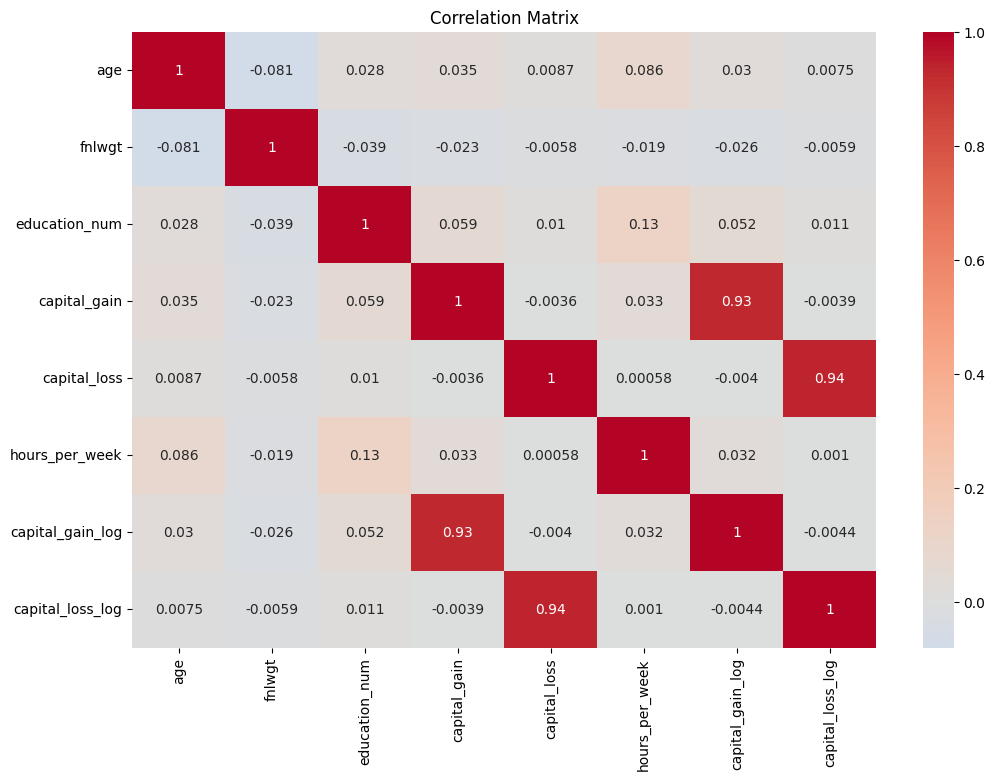

In [25]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

- there is no linear relation between the attributes of the dataset , except between log tranformed data and their original data